This notebook is used to test already trained deep learning models (.joblib file) on new, unseen data.

In [1]:
# Read test samples. Adapt the directory link according to which data encoding you want to use (Sequences or Count-based encoding)

import pandas as pd
from sklearn.metrics import classification_report

# Possible critical alarm types
critical_alarm_types = [7,15,16,21,33,56,68,95,1000,1001]
df = pd.DataFrame()

for i in critical_alarm_types:
    type_df = pd.read_csv("../Data/Test/9 months/Last 20/4 Separated by error type/Sequences/Classic/" + str(i) + ".csv") # Replace the link according to the data you want to read (Sequence encoding or count-based encoding)
    df = pd.concat([df, type_df], ignore_index=True)

X_test = df.drop(columns=['y']).values
y_test = df['y'].values

In [2]:
# Load existing model. Make sure that you choose the correct model. The data encoding of the data you have loaded above needs to correspond to the encoding with which the selected model has been trained (Count-based or Sequence encoding).

import joblib

model = joblib.load("../Results/Unique Samples/Sequences/Random Forest/RF_Unique_Sequences.joblib")

In [3]:
# Prediction

y_pred = model.predict(X_test)

In [9]:
# Print the classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.54      0.91      0.68      3287
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         7
          33       0.00      0.00      0.00         3
          56       0.74      0.05      0.10      1658
          68       0.68      0.78      0.73     44424
          95       0.00      0.00      0.00        44
        1000       0.01      0.09      0.01        96
        1001       0.58      0.42      0.49     30917

    accuracy                           0.63     80465
   macro avg       0.25      0.23      0.20     80465
weighted avg       0.63      0.63      0.62     80465



C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jkaszyda\.conda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


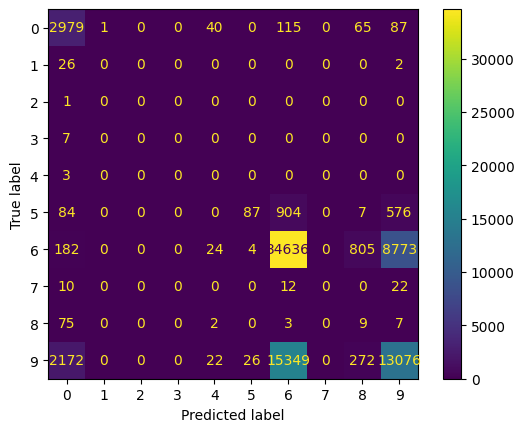

In [10]:
# Print confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

label_names = ['7', '15', '16', '21', '33', '56', '68', '95', '1000', '1001']

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()
plt.show()